### Exploratory data analysis (EDA)

#### Importing Libraries

In [56]:
# we will need to import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.encoding import OrdinalEncoder
%matplotlib inline
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec

import seaborn as sns

# Plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [57]:
path = "houseprice.csv"
df = pd.read_csv(path)

In [58]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [59]:
pd.set_option('display.max_columns', None)

In [60]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

 - As we can see that there are a lot of features that have more than 70% missing values.
 - Along with this there are features that have less than 10% as missing values.
 - All these would be taken care in the feature engineering session.

In [62]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Description of columns

- Id: Identifier for each observation.
- MSSubClass: The building class.
- MSZoning: The general zoning classification of the property.
- LotFrontage: Linear feet of street connected to property.
- LotArea: Lot size in square feet.
- Street: Type of road access to property.
- Alley: Type of alley access to property.
- LotShape: General shape of property.
- LandContour: Flatness of the property.
- Utilities: Type of utilities available.
- LotConfig: Lot configuration.
- LandSlope: Slope of property.
- Neighborhood: Physical locations within Ames city limits.
- Condition1: Proximity to various conditions.
- Condition2: Proximity to various conditions (if more than one is present).
- BldgType: Type of dwelling.
- HouseStyle: Style of dwelling.
- OverallQual: Overall material and finish quality.
- OverallCond: Overall condition rating.
- YearBuilt: Original construction date.
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions).
- RoofStyle: Type of roof.
- RoofMatl: Roof material.
- Exterior1st: Exterior covering on house.
- Exterior2nd: Exterior covering on house (if more than one material).
- MasVnrType: Masonry veneer type.
- MasVnrArea: Masonry veneer area in square feet.
- ExterQual: Exterior material quality.
- ExterCond: Present condition of the material on the exterior.
- Foundation: Type of foundation.
- BsmtQual: Height of the basement.
- BsmtCond: General condition of the basement.
- BsmtExposure: Walkout or garden level basement walls.
- BsmtFinType1: Quality of basement finished area.
- BsmtFinSF1: Type 1 finished square feet.
- BsmtFinType2: Quality of second finished area (if present).
- BsmtFinSF2: Type 2 finished square feet.
- BsmtUnfSF: Unfinished square feet of basement area.
- TotalBsmtSF: Total square feet of basement area.
- Heating: Type of heating.
- HeatingQC: Heating quality and condition.
- CentralAir: Central air conditioning.
- Electrical: Electrical system.
- 1stFlrSF: First floor square feet.
- 2ndFlrSF: Second floor square feet.
- LowQualFinSF: Low quality finished square feet (all floors).
- GrLivArea: Above grade (ground) living area square feet.
- BsmtFullBath: Basement full bathrooms.
- BsmtHalfBath: Basement half bathrooms.
- FullBath: Full bathrooms above grade.
- HalfBath: Half baths above grade.
- BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms).
- KitchenAbvGr: Kitchens above grade.
- KitchenQual: Kitchen quality.
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms).
- Functional: Home functionality rating.
- Fireplaces: Number of fireplaces.
- FireplaceQu: Fireplace quality.
- GarageType: Garage location.
- GarageYrBlt: Year garage was built.
- GarageFinish: Interior finish of the garage.
- GarageCars: Size of garage in car capacity.
- GarageArea: Size of garage in square feet.
- GarageQual: Garage quality.
- GarageCond: Garage condition.
- PavedDrive: Paved driveway.
- WoodDeckSF: Wood deck area in square feet.
- OpenPorchSF: Open porch area in square feet.
- EnclosedPorch: Enclosed porch area in square feet.
- 3SsnPorch: Three season porch area in square feet.
- ScreenPorch: Screen porch area in square feet.
- PoolArea: Pool area in square feet.
- PoolQC: Pool quality.
- Fence: Fence quality.
- MiscFeature: Miscellaneous feature not covered in other categories.
- MiscVal: Value of miscellaneous feature.
- MoSold: Month Sold (MM).
- YrSold: Year Sold (YYYY).
- SaleType: Type of sale.
- SaleCondition: Condition of sale.
- SalePrice: Sale price ($).

##### Description of our dataset

In [63]:
df.describe().T
# We have transposed the data: switch rows and columns for more convenient redability

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


- The describe() function in pandas DataFrame provides summary statistics of numerical columns in the DataFrame. 
- It calculates various descriptive statistics, such as count, mean, standard deviation, minimum, maximum, and quartile values (25th, 50th, and 75th percentiles).


In [64]:
# Lets take a columns "YrSold" as example for better understanding:

df["YrSold"].describe().T


count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64

- There are 1460 observations (rows) in the dataset.
- The mean year of sale is approximately 2007.82, indicating that, on average, properties were sold around this time.
- The standard deviation is relatively low (1.33), suggesting that the values are tightly clustered around the mean.
- min: The minimum value in the column, which is 2006, indicating the earliest year of sale.
- max: The maximumu value in the column, which is 2010, indicating the latest year of sale.
- 25%: The first quartile (Q1), or 25th percentile, which is 2007. This means 25% of the data falls below this value.
- 50%: The second quartile (Q2), or median, which is 2008. Half of the data falls below this value.
- 75%: The third quartile (Q3), which is 2009. This means 75% of the data falls below this value.
- Overall, this summary provides an overview of the distribution and central tendency of the "Year Sold" variable in the dataset.

In [65]:
# Let's look at the skewness of our dataset

df.skew()

C:\Users\petyu\AppData\Local\Temp\ipykernel_23644\4197454130.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

#### Skewness tells us about the symmetry in a distribution

   #### Negatively skewed variables: 
- YearBuilt, YearRemodAdd, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, and GarageArea. These variables have skewness values less than 0, indicating that their distributions are skewed to the left.
##### Positively skewed variables: 
- MSSubClass, LotFrontage, LotArea, OverallCond, MasVnrArea, BsmtFinSF2, 2ndFlrSF, LowQualFinSF, BsmtHalfBath, HalfBath, BedroomAbvGr, KitchenAbvGr, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, and SalePrice. These variables have skewness values greater than 0, indicating that their distributions are skewed to the right.
##### Variables with very high skewness: 
- PoolArea, MiscVal, and 3SsnPorch. These variables have extremely high skewness values, suggesting significant skewness in their distributions.

##### Understanding the skewness of each variable can help in identifying potential transformations or adjustments needed to make the data more symmetrical, which is often beneficial for certain statistical analyses and modeling techniques.

In [66]:
# For better understanding lets take a look to these columns
print(df["YearBuilt"].skew())
print(df["YearRemodAdd"].skew())

-0.613461172488183
-0.5035620027004709


- Regarging "YearBuilt" column, this indicates that there are more instances of properties being built in earlier years relative to later years, resulting in a distribution skewed towards earlier years =>  Larger concentration of older properties in the dataset, with fewer newer properties 

- In the context of "YearRemodeAdd," a negative skewness suggests that there may be more instances where remodeling or additions to properties occurred in earlier years relative to later years, resulting in a distribution skewed towards earlier years. 

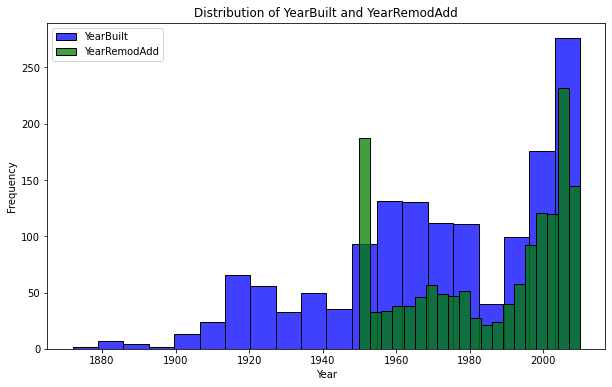

In [67]:
# for better understanding lets create a plot for these two columns

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plotting histogram for YearBuilt
sns.histplot(df['YearBuilt'], bins=20, color='blue', label='YearBuilt')

# Plotting histogram for YearRemodeAdd
sns.histplot(df['YearRemodAdd'], bins=20, color='green', label='YearRemodAdd')

# Adding labels and title
plt.title('Distribution of YearBuilt and YearRemodAdd')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend()  # Show legend with labels

plt.show()

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- As you can see, our data frame consitsts of 3 datatypes:
- float, integer and object. Of which integer is 35, object 3, and float 3 
- We don't have complete data for all of our features (not 1460)

## Null Values

In [69]:
df.isnull().sum().sum()

6965

In [70]:
# Lets split data frame on train and test sets
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)
df_train.shape, df_test.shape

((1022, 81), (438, 81))

In [71]:
# Drop Id column as it is not required

df_train.drop(columns=['Id'], axis=1, inplace=True)
df_test.drop(columns=['Id'], axis=1, inplace=True)

In [72]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
64,60,RL,NaN,9375,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,573.0,TA,TA,PConc,Gd,TA,No,GLQ,739,Unf,0,318,1057,GasA,Ex,Y,SBrkr,1057,977,0,2034,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,1998.0,RFn,2,645,TA,TA,Y,576,36,0,0,0,0,NaN,GdPrv,NaN,0,2,2009,WD,Normal,219500
682,120,RL,NaN,2887,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1Story,6,5,1996,1997,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,Gd,TA,Mn,GLQ,1003,Unf,0,288,1291,GasA,Ex,Y,SBrkr,1291,0,0,1291,1,0,1,0,2,1,Gd,6,Typ,1,Gd,Attchd,1996.0,Unf,2,431,TA,TA,Y,307,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,Normal,173000
960,20,RL,50.0,7207,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,5,7,1958,2008,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Gd,BLQ,696,Unf,0,162,858,GasA,Gd,Y,SBrkr,858,0,0,858,1,0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,117,0,0,0,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal,116500
1384,50,RL,60.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,6,5,1939,1950,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,Mn,Rec,204,Unf,0,356,560,GasA,TA,Y,SBrkr,698,560,0,1258,0,0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1939.0,Unf,1,280,TA,TA,P,0,0,0,0,0,0,NaN,MnPrv,NaN,0,10,2009,WD,Normal,105000
1100,30,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1Story,2,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,Fa,No,Rec,290,Unf,0,0,290,GasA,TA,N,FuseF,438,0,0,438,0,0,1,0,1,1,Fa,3,Typ,0,NaN,Detchd,1930.0,Unf,1,246,TA,TA,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2009,WD,Normal,60000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,60,RL,82.0,9430,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,673.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,1163,Unf,0,89,1252,GasA,Ex,Y,SBrkr,1268,1097,0,2365,1,0,2,1,3,1,Gd,8,Typ,1,Gd,Attchd,1999.0,RFn,3,856,TA,TA,Y,0,128,0,0,180,0,NaN,NaN,NaN,0,7,2009,WD,Normal,337000
835,20,RL,60.0,9600,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,4,7,1950,1995,Gable,CompShg,VinylSd,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,No,BLQ,442,Unf,0,625,1067,GasA,TA,Y,SBrkr,1067,0,0,1067,0,0,2,0,2,1,Gd,4,Min2,0,NaN,Attchd,1996.0,Unf,2,436,TA,TA,Y,290,0,0,0,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal,128000
1216,90,RM,68.0,8930,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,RRAe,Norm,Duplex,1.5Fin,6,5,1978,1978,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1318,584,0,1902,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1978.0,Unf,2,539,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,112000
559,120,RL,NaN,3196,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,18.0,Gd,TA,PConc,Gd,TA,Gd,Unf,0,Unf,0,1374,1374,GasA,Ex,Y,SBrkr,1557,0,0,1557,0,0,2,0,2,1,Gd,7,Ty

In [73]:
# let's see if our dataset contains missing values.

df_train.isna().sum().sum()

4857

- 4857 is a huge number which indicates that there are a lot of missing values in train data set

In [74]:
df_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
529,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
491,50,RL,79.0,9490,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,1Fam,1.5Fin,6,7,1941,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,403,Rec,165,238,806,GasA,TA,Y,FuseA,958,620,0,1578,1,0,1,0,3,1,Fa,5,Typ,2,TA,Attchd,1941.0,Unf,1,240,TA,TA,Y,0,0,32,0,0,0,NaN,MnPrv,NaN,0,8,2006,WD,Normal,133000
459,50,RL,NaN,7015,Pave,NaN,IR1,Bnk,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,5,4,1950,1950,Gable,CompShg,MetalSd,MetalSd,BrkCmn,161.0,TA,TA,CBlock,TA,TA,No,LwQ,185,Unf,0,524,709,GasA,TA,Y,SBrkr,979,224,0,1203,1,0,1,0,3,1,Gd,5,Typ,1,TA,Detchd,1950.0,Unf,1,352,TA,TA,Y,0,0,248,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,110000
279,60,RL,83.0,10005,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,2Story,7,5,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,299.0,TA,TA,CBlock,Gd,TA,No,BLQ,392,Unf,0,768,1160,GasA,Ex,Y,SBrkr,1156,866,0,2022,0,0,2,1,4,1,TA,8,Typ,1,TA,Attchd,1977.0,Fin,2,505,TA,TA,Y,288,117,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal,192000
655,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,6,5,1971,1971,Gable,CompShg,HdBoard,ImStucc,BrkFace,381.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,525,525,GasA,TA,Y,SBrkr,525,567,0,1092,0,0,1,1,3,1,TA,6,Typ,0,NaN,Detchd,1971.0,Unf,1,264,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Family,88000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,20,RL,73.0,39104,Pave,NaN,IR1,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,7,1954,2005,Flat,Membran,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Gd,LwQ,226,GLQ,1063,96,1385,GasA,Ex,Y,SBrkr,1363,0,0,1363,1,0,1,0,2,1,TA,5,Mod,2,TA,Attchd,1954.0,Unf,2,439,TA,TA,Y,81,0,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal,241500
445,20,RL,73.0,9855,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,5,1956,1956,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1436,1436,GasA,Fa,Y,SBrkr,1689,0,0,1689,0,0,1,0,3,1,TA,7,Typ,1,Gd,Attchd,1956.0,Unf,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,11,2009,COD,Normal,127500
654,20,RL,91.0,10437,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1Story,8,6,1995,1995,Hip,CompShg,MetalSd,MetalSd,BrkFace,660.0,Gd,Gd,PConc,Gd,TA,Gd,GLQ,1696,Unf,0,413,2109,GasA,Ex,Y,SBrkr,2113,0,0,2113,1,0,2,1,2,1,Gd,7,Typ,1,TA,Attchd,1995.0,Fin,3,839,TA,TA,Y,236,46,0,0,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal,350000
1280,20,RL,67.0,9808,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,110.0,Gd,TA,PConc,Gd,TA,No,GLQ,788,Unf,0,785,1573,GasA,Ex,Y,SBrkr,1573,0,0,1573,1,

In [75]:
# Find out missing values in test dataset.
df_test.isna().sum().sum()

2108

In [76]:
# First we create a list of missing values by each feature
temp = list(df_train.isna().sum())

# then we create a list of columns and their missing values as inner list to a separate list
lst = []
i = 0
for col in df_train.columns:
    insert_lst = [col, temp[i]]
    lst.append(insert_lst)
    i += 1

# finally create a dataframe
temp_df = pd.DataFrame(data=lst, columns=['Column_Name', 'Missing_Values'])
temp_df = temp_df[temp_df["Missing_Values"] > 0]
temp_df

,Column_Name,Missing_Values
2,LotFrontage,189
5,Alley,960
24,MasVnrType,5
25,MasVnrArea,5
29,BsmtQual,24
30,BsmtCond,24
31,BsmtExposure,24
32,BsmtFinType1,24
34,BsmtFinType2,25
41,Electrical,1


In [77]:
fig = px.bar(temp_df.sort_values(by='Missing_Values'), x='Missing_Values', y='Column_Name',
             orientation='h', height=1500, width=900, color='Missing_Values', text='Missing_Values', title='Missing values in train dataset')
fig.update_traces(textposition='outside')
fig.show()

In [78]:
temp_df[temp_df['Missing_Values'] > 0].sort_values(by='Missing_Values',
                                                   ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds')

,Column_Name,Missing_Values
0,PoolQC,1019
1,MiscFeature,978
2,Alley,960
3,Fence,831
4,FireplaceQu,478
5,LotFrontage,189
6,GarageType,54
7,GarageYrBlt,54
8,GarageFinish,54
9,GarageQual,54


- We can see that Alley, FlreplaceQu, PoolQC, Fence and MiscFeature has a lot of missing values

#### Missing values in test data set

In [79]:
temp = list(df_test.isna().sum())

# then we create a list of columns and their missing values as inner list to a separate list
lst = []
i = 0
for col in df_test.columns:
    insert_lst = [col, temp[i]]
    lst.append(insert_lst)
    i += 1

# finally create a dataframe
temp_df = pd.DataFrame(data=lst, columns=['Column_Name', 'Missing_Values'])
temp_df = temp_df[temp_df["Missing_Values"] > 0]
temp_df

,Column_Name,Missing_Values
2,LotFrontage,70
5,Alley,409
24,MasVnrType,3
25,MasVnrArea,3
29,BsmtQual,13
30,BsmtCond,13
31,BsmtExposure,14
32,BsmtFinType1,13
34,BsmtFinType2,13
56,FireplaceQu,212


In [80]:
fig = px.bar(temp_df.sort_values(by='Missing_Values'), x='Missing_Values', y='Column_Name',
             orientation='h', height=1500, width=900, color='Missing_Values', text='Missing_Values', title='Missing values in train dataset')
fig.update_traces(textposition='outside')
fig.show()

In [81]:
temp_df[temp_df['Missing_Values'] > 0].sort_values(by='Missing_Values',
                                                   ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds')

,Column_Name,Missing_Values
0,PoolQC,434
1,MiscFeature,428
2,Alley,409
3,Fence,348
4,FireplaceQu,212
5,LotFrontage,70
6,GarageType,27
7,GarageYrBlt,27
8,GarageFinish,27
9,GarageQual,27


- We have less features here with missing values. 
- We can see that Alley, FlreplaceQu, PoolQC, Fence and MiscFeature has the most of missing values (like in train set)

#### Firstly, we'll deal with the numerical features in train dataset and do similar changes in test dataset.


- LotFrontage has 189 missing values.

- MasVnrArea has only 5 missing values

- GarageyrBlt has 54 missing values.


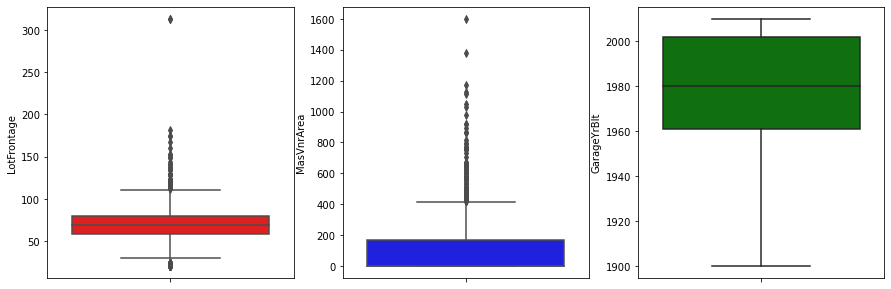

In [82]:
# There's no need of dropping the na values as we have less missing values.
# If there are outliers in these three columns, we can fill them with their median values.
# if not then mean is fine.

plt.figure(figsize=(15, 5))

features_to_examine = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
temp = df[features_to_examine]
colors = ['', 'red', 'blue', 'green']
i = 1
for col in temp.columns:
    plt.subplot(1, 3, i)
    a1 = sns.boxplot(data=temp, y=col, color=colors[i])
    i += 1

In [83]:
# There are outliers in Lotfrontage and MasVnrArea .
# Let's look at the mean and median values of all three columns

df_train['LotFrontage'].mean(), df_train['LotFrontage'].median()

(69.66866746698679, 69.0)

In [84]:
df_train['MasVnrArea'].mean(), df_train['MasVnrArea'].median()

(103.55358898721731, 0.0)

In [85]:
df_train['GarageYrBlt'].mean(), df_train['GarageYrBlt'].median()

(1978.0123966942149, 1979.0)

In [86]:
- The mean and median values of MasVnrArea are significantly different.
- If there are outliers present, we'll go with median values.

SyntaxError: invalid syntax (2936805722.py, line 1)

In [87]:
features_to_examine

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [88]:
# filling the missing values with median
for col in features_to_examine:
    df_train[col].fillna(df_train[col].median(), inplace=True)

In [89]:
# for test dataset
for col in features_to_examine:
    df_test[col].fillna(df_test[col].median(), inplace=True)

In [90]:
# We can see that there are no missing values present now

df_train[features_to_examine].isna().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [91]:
df_test[features_to_examine].isna().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [92]:
features_to_examine = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                       'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish',
                       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

- Some of the categorical features have many missing values.
- Instead of filling them we can simply drop these columns

- PoolQC,MiscFeature,Alley and Fence are the categorical features with more than 1000 missing values in the data

In [94]:
df_train['PoolQC'].value_counts()

Gd    2
Ex    1
Name: PoolQC, dtype: int64

In [95]:
df_train['MiscFeature'].value_counts()

Shed    40
Gar2     2
Othr     2
Name: MiscFeature, dtype: int64

In [96]:
df_train['Alley'].value_counts()

Pave    32
Grvl    30
Name: Alley, dtype: int64

In [97]:
df_train['Fence'].value_counts()

MnPrv    101
GdPrv     46
GdWo      37
MnWw       7
Name: Fence, dtype: int64

- As there is very less data available for these four columns,we can drop them

In [98]:
# Dropping columns in both train and test datasets.

df_train.drop(columns=['PoolQC', 'MiscFeature',
              'Alley', 'Fence'], axis=1, inplace=True)
df_test.drop(columns=['PoolQC', 'MiscFeature',
             'Alley', 'Fence'], axis=1, inplace=True)

In [99]:
df_train['FireplaceQu'].value_counts()

Gd    255
TA    229
Fa     26
Ex     18
Po     16
Name: FireplaceQu, dtype: int64

- We only have half of Fireplace quality data.Let's have a look at the Fireplaces feature.

In [101]:
df_train[df_train['FireplaceQu'].isnull()][['Fireplaces', 'FireplaceQu']]

,Fireplaces,FireplaceQu
64,0,NaN
960,0,NaN
1384,0,NaN
1100,0,NaN
472,0,NaN
...,...,...
1033,0,NaN
1383,0,NaN
835,0,NaN
1216,0,NaN


- So we can see that the missing values are at those places , where number of fireplaces is zero.
- We can't fill these missing values with anything.As there is no meaning in it.
- Instead we will create a separate category in FireplaceQu feature of NotAvailable.

In [103]:
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna('NotAvailable')
df_test['FireplaceQu'] = df_test['FireplaceQu'].fillna('NotAvailable')

In [104]:
# Out of the features to examine , following are left
features_to_examine = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish',
                       'GarageQual', 'GarageCond']

- Now we'll go one by one , to see by what factor to fill the null values of above columns

1) MasVnrType¶

In [108]:
df_train['MasVnrType'].isna().sum()

5

In [109]:
# Unique elements
df_train['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [110]:
df_train[df_train['MasVnrType'].isnull()][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
1278,NaN,0.0
936,NaN,0.0
650,NaN,0.0
234,NaN,0.0
973,NaN,0.0


- If we look at the types of masonry venner and their corresponding area,
- for all the missing values , Area is zero
- So we can fill these missing values with "None"

In [111]:
# Let's look at the repeated value in MasVnrType column

df_train['MasVnrType'].mode()

0    None
Name: MasVnrType, dtype: object

- We can replace MasVnrType missing values with mode.

2) Basement

In [113]:
df_train[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
          'BsmtFinType2']].isna().sum()

BsmtQual        24
BsmtCond        24
BsmtExposure    24
BsmtFinType1    24
BsmtFinType2    25
dtype: int64

In [114]:
df_train[df_train['BsmtQual'].isnull()][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF1',
                                         'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
1011,NaN,NaN,NaN,NaN,NaN,0,0,0,0
553,NaN,NaN,NaN,NaN,NaN,0,0,0,0
1045,NaN,NaN,NaN,NaN,NaN,0,0,0,0
371,NaN,NaN,NaN,NaN,NaN,0,0,0,0
533,NaN,NaN,NaN,NaN,NaN,0,0,0,0
1412,NaN,NaN,NaN,NaN,NaN,0,0,0,0
1232,NaN,NaN,NaN,NaN,NaN,0,0,0,0
90,NaN,NaN,NaN,NaN,NaN,0,0,0,0
532,NaN,NaN,NaN,NaN,NaN,0,0,0,0
17,NaN,NaN,NaN,NaN,NaN,0,0,0,0


In [115]:
df_train[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
          'BsmtFinType2']].value_counts()

BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2
TA        TA        No            Unf           Unf             105
Gd        TA        No            Unf           Unf             101
                                  GLQ           Unf              93
TA        TA        No            ALQ           Unf              53
                                  Rec           Unf              51
                                                               ... 
Gd        TA        Mn            ALQ           LwQ               1
                    Gd            GLQ           LwQ               1
                                  BLQ           Unf               1
                                                ALQ               1
                    No            GLQ           LwQ               1
Length: 158, dtype: int64

In [116]:
df_train["BsmtCond"].value_counts()

TA    917
Gd     46
Fa     33
Po      2
Name: BsmtCond, dtype: int64

In [117]:
df_train[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
          'BsmtFinType2']].mode()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
0,TA,TA,No,Unf,Unf


- What I have understood is , the missing data may be because there is no basement.
- As all the other basement features as seen above are zero
- We can't fill the missing values with mode values
- We'll fill the null values with No Basement

- Method mode() returns the most frequent value in the columns

3) Electrical

In [119]:
df_train['Electrical'].isna().sum()

1

In [120]:
df_train['Electrical'].mode()

0    SBrkr
Name: Electrical, dtype: object

- As there is only 1 missing value, we will replace it with mode value i.e SbrKr

4) Garage

In [121]:
df_train[['GarageType', 'GarageFinish',
          'GarageQual', 'GarageCond']].isna().sum()

GarageType      54
GarageFinish    54
GarageQual      54
GarageCond      54
dtype: int64

In [122]:
df_train[df_train['GarageType'].isnull()][['GarageType', 'GarageYrBlt', 'GarageFinish',
                                           'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
960,NaN,1979.0,NaN,0,0,NaN,NaN
1011,NaN,1979.0,NaN,0,0,NaN,NaN
1283,NaN,1979.0,NaN,0,0,NaN,NaN
1038,NaN,1979.0,NaN,0,0,NaN,NaN
165,NaN,1979.0,NaN,0,0,NaN,NaN
1349,NaN,1979.0,NaN,0,0,NaN,NaN
533,NaN,1979.0,NaN,0,0,NaN,NaN
386,NaN,1979.0,NaN,0,0,NaN,NaN
88,NaN,1979.0,NaN,0,0,NaN,NaN
1453,NaN,1979.0,NaN,0,0,NaN,NaN


In [136]:
df_train['GarageQual'].value_counts()

TA        919
No_Grg     54
Fa         35
Gd          9
Po          3
Ex          2
Name: GarageQual, dtype: int64

In [123]:
df_train[['GarageType', 'GarageFinish',
          'GarageQual', 'GarageCond']].mode()

,GarageType,GarageFinish,GarageQual,GarageCond
0,Attchd,Unf,TA,TA


- There are 81 missing values in each of the four columns.

- The missing data may be as no data is available for the garage.
- We can't fill these too with their mode values as we do not have any idea about the garage.
- We'll simply fill them with No Garage

In [125]:
df_train['MasVnrType'].fillna('None', inplace=True)
fill_with_No_Bsmt = ['BsmtQual', 'BsmtCond',
                     'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
fill_with_No_Grg = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

for col in fill_with_No_Bsmt:
    df_train[col].fillna('No_Bsmt', inplace=True)
    df_test[col].fillna('No_Bsmt', inplace=True)

for col in fill_with_No_Grg:
    df_train[col].fillna('No_Grg', inplace=True)
    df_test[col].fillna('No_Grg', inplace=True)

df_train['Electrical'].fillna('SBrkr', inplace=True)
df_test['Electrical'].fillna('SBrkr', inplace=True)

In [126]:
# Let's check if there any missing values left in train dataset first

df_train.isna().sum().sum()

0

In [127]:
# Let's check for test dataset

df_test.isna().sum().sum()

3

- There are still some missing values in test dataset as we were following train dataset

In [129]:
# Use the same code to see which features are left with missing values.

temp = list(df_test.isna().sum())

# then we create a list of columns and their missing values as inner list to a separate list
lst = []
i = 0
for col in df_test.columns:
    insert_lst = [col, temp[i]]
    lst.append(insert_lst)
    i += 1

# finally create a dataframe
temp_df = pd.DataFrame(data=lst, columns=['Column_Name', 'Missing_Values'])

temp_df = temp_df[temp_df['Missing_Values'] > 0].sort_values(by='Missing_Values',
                                                             ascending=False).reset_index(drop=True)

temp_df.style.background_gradient(cmap='Reds')

,Column_Name,Missing_Values
0,MasVnrType,3


- There are still some missing values in test dataset as we were following train dataset

In [130]:
# We fill all the categorical features with mode and numerical features with mean

categorical_features = [
    col for col in features_to_examine if df_test[col].dtype == 'O']

for feature in categorical_features:
    df_test[feature] = df_test[feature].fillna(df_test[feature].mode()[0])

In [131]:
df_test.isna().sum().sum()

0

- Thus , we are done with missing values in both training and test dataset¶

<AxesSubplot:>

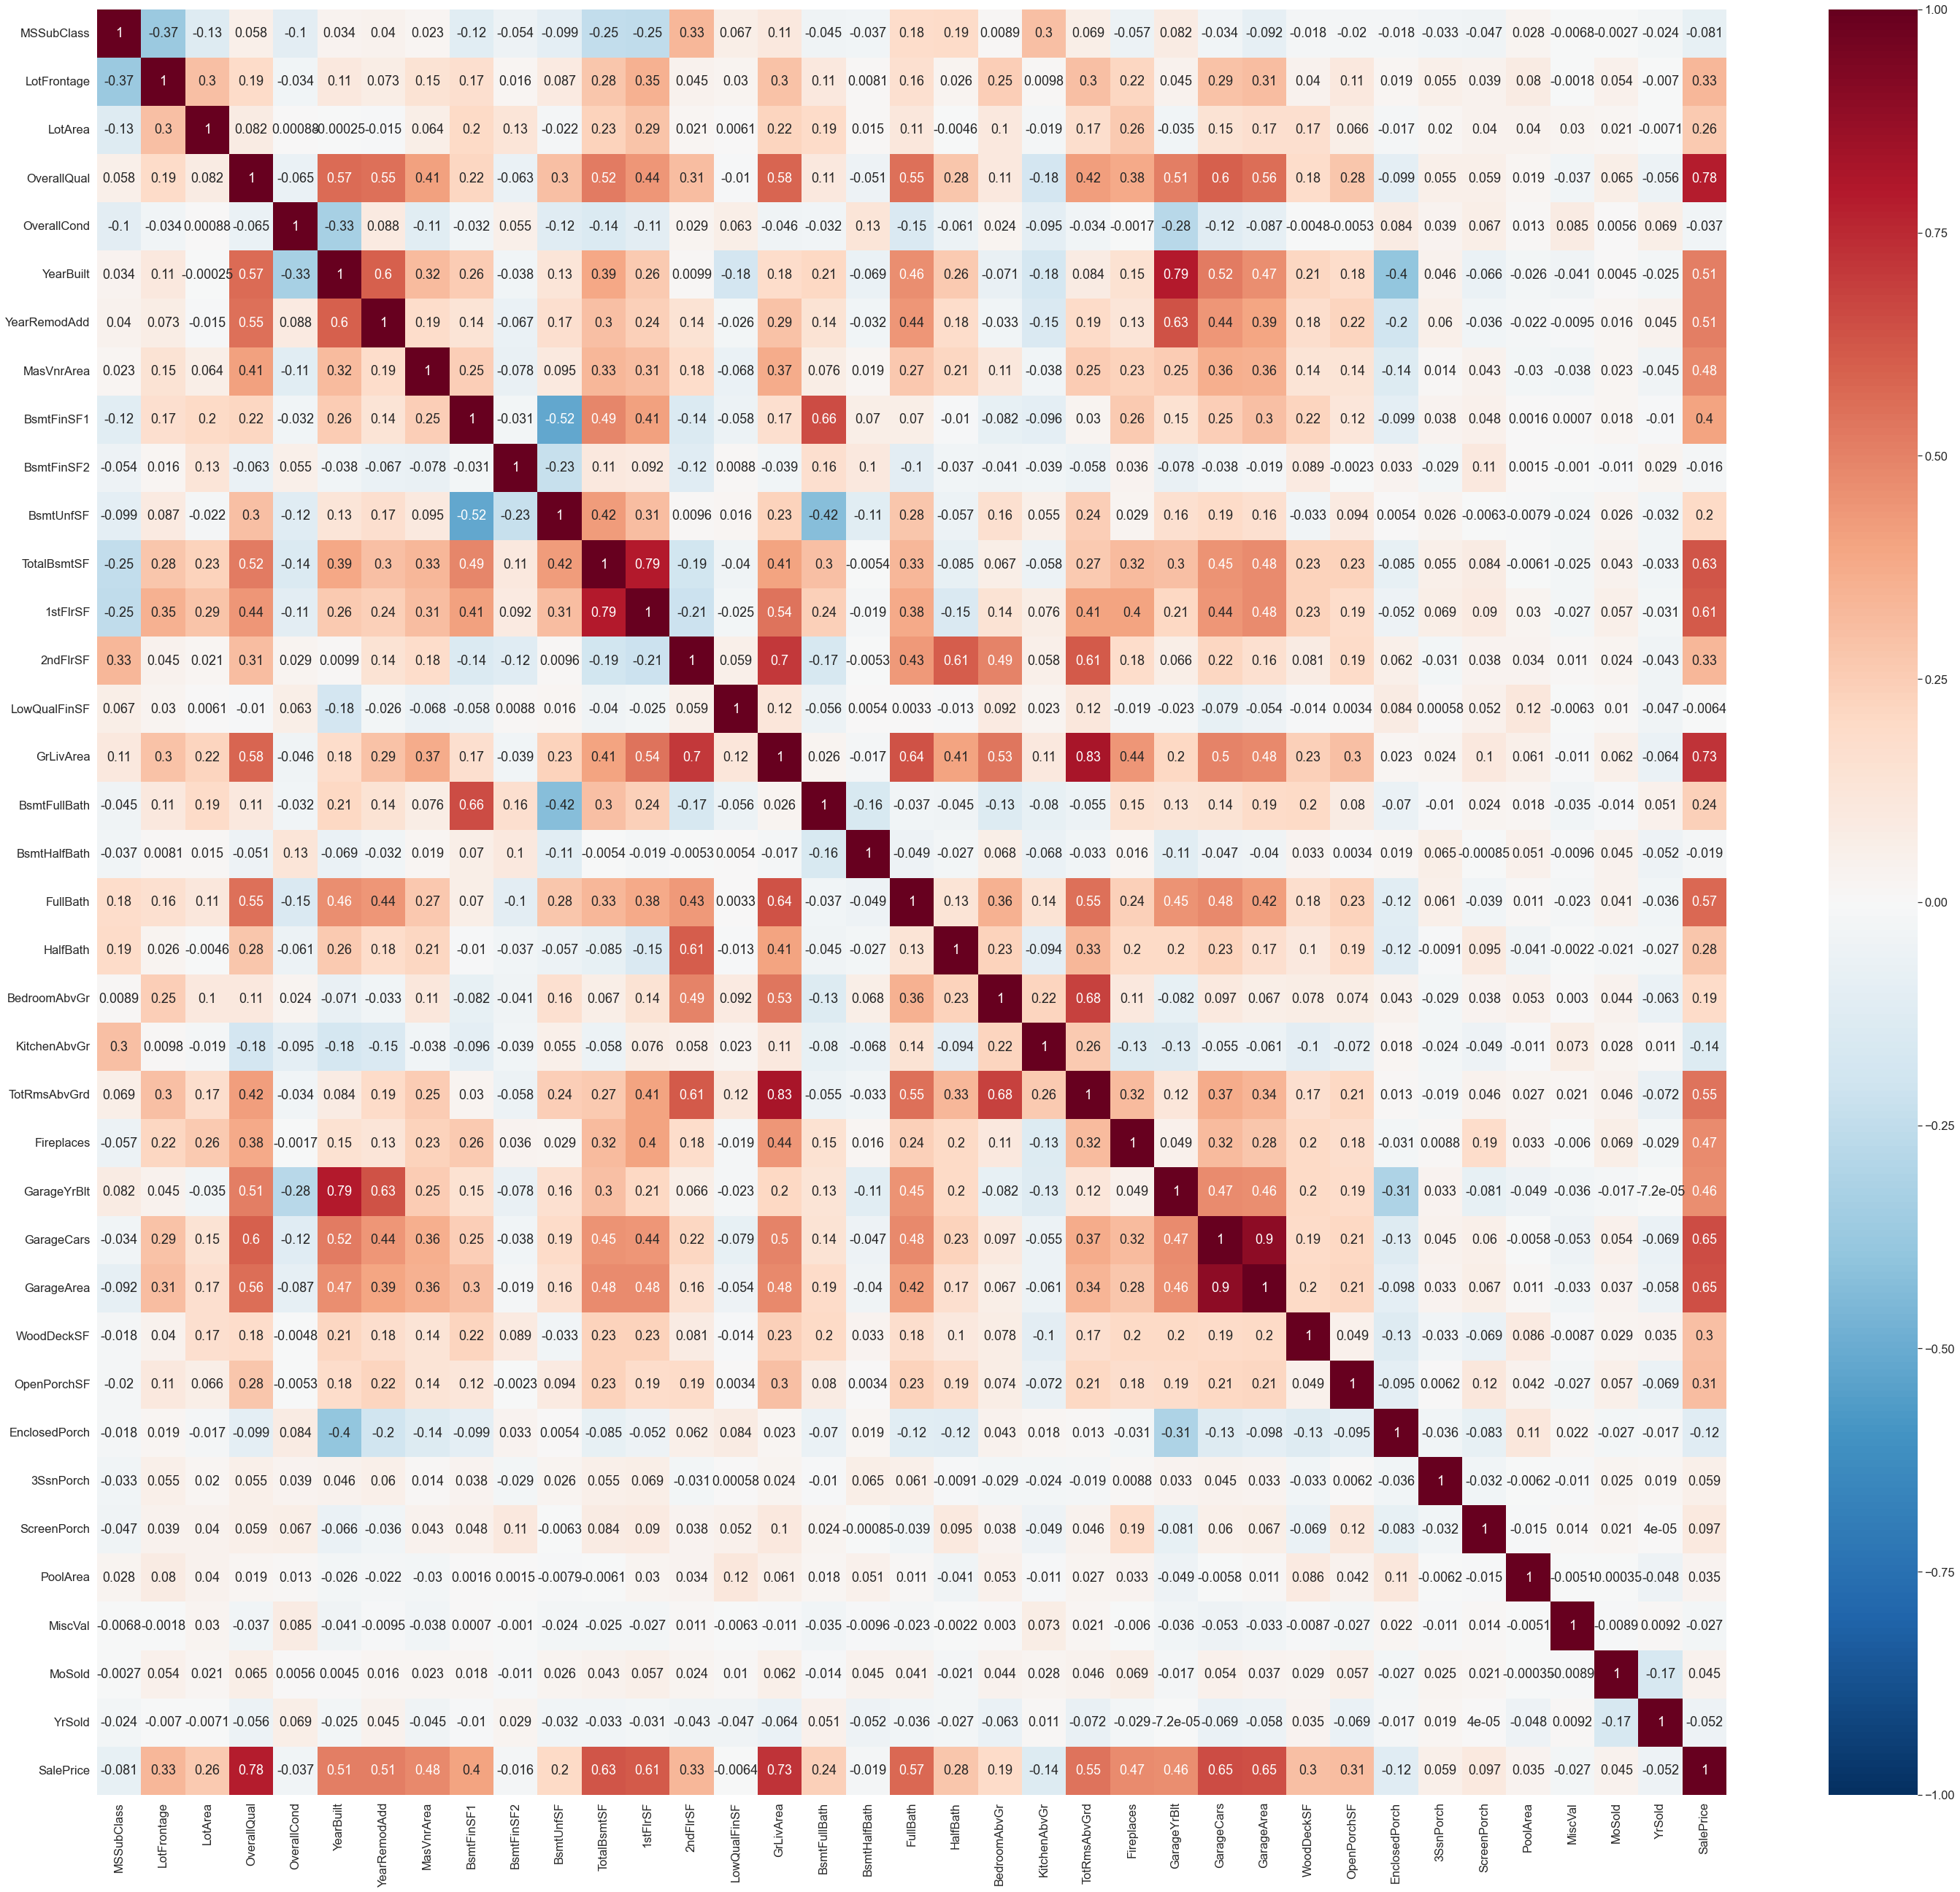

In [134]:
sns.set(font_scale=1.5)
plt.figure(figsize=(50, 45))
sns.heatmap(df_train.corr(), cmap="RdBu_r", annot=True, vmin=-1, vmax=1)

- As you can see , 'OverallCond',"YearBuilt', 'YearRemodadd', 'GarageArea', 'GarageCars', 'FullBath', 'GrLivArea' are strongly correlated with "SalePrice